In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

import re
import string
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# pip install pyLDAvis

### Removing all blank lines in each text file

In [3]:
folder = 'Articles'

file_names = [file_name for file_name in os.listdir(folder) if file_name.endswith('.txt')]

for file_name in file_names:
    with open(os.path.join(folder, file_name), 'r', encoding='latin-1') as file:
        lines = file.readlines()
        
    lines = [line.strip() for line in lines if line.strip()]
    
    with open(os.path.join(folder, file_name), 'w', encoding='latin-1') as file:
        _=file.write('\n'.join(lines))
        _=file.truncate()

### Splitting each text file into individual articles:
- Create a separate folder called "Articles_split" where all the individual articles are stored
- Remove any articles that are blank

In [4]:
folder_out = 'Articles_split'

if not os.path.exists(folder_out):
    os.makedirs(folder_out)

end_pattern = r'Document\s+\w+'

file_names = [file_name for file_name in os.listdir(folder) if file_name.endswith('.txt')]

for file_name in file_names:
    with open(os.path.join(folder, file_name), 'r', encoding='latin-1') as file:
        file_contents = file.read()
        
    articles = re.split(end_pattern, file_contents) #splitting into articles based on end pattern
    
    # Write those splitted articles into separate text files and store in output folder defined above
    for i, article in enumerate(articles):
        article_filename = f'{os.path.splitext(file_name)[0]}_article_{i + 1}.txt'
        
        with open(os.path.join(folder_out, article_filename), 'w', encoding='latin-1') as output_file:
            _=output_file.write(article)
            
    # Removing blank articles:            
    if os.path.getsize(os.path.join(folder_out, article_filename)) == 0 or open(os.path.join(folder_out, article_filename), encoding='latin-1').read().isspace():
        _=os.remove(os.path.join(folder_out, article_filename))

### Preprocessing

In [5]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [6]:
processed_text = []

file_names = [file_name for file_name in os.listdir(folder_out) if file_name.endswith('.txt')]

for file_name in file_names:

    with open(os.path.join(folder_out, file_name), 'r', encoding='latin-1') as file:
        text = file.read().strip()

        #Remove punctuation:
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

        #Remove numbers:
        text = re.sub(r'\d+', '', text)
        
        #Remove non-alphabetical characters:
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        
        #Tokenization:
        words = word_tokenize(text)
        
        #Lowercase:
        words = [word.lower() for word in words]

        #Remove stopwords:
        words = [word for word in words if word not in stop_words]
        
        #Lemmatization:
        lemma = WordNetLemmatizer()
        words = [lemma.lemmatize(word) for word in words]

        #Stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

        #Normalization and Cleaning:
        text = ' '.join(words)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'can\'t', 'cannot', text)

        processed_text.append(text)

### Removing stop words and finding top 30 common words

In [7]:
processed_words = []
corpus_words = []
for i in processed_text:
    processed_words.append(i.split())
    corpus_words.extend(i.split())

In [9]:
freq_dist = nltk.FreqDist(corpus_words)
common_30 = freq_dist.most_common(30)

df_common_30 = pd.DataFrame(common_30, columns=['Common Words', 'Frequency'])
df_common_30

,Common Words,Frequency
0,said,11690
1,state,10494
2,mr,10022
3,trump,7724
4,islam,6718
5,new,6228
6,time,5997
7,u,4969
8,presid,4627
9,attack,4353


### Top 30 most common bigrams

In [10]:
bigrams = nltk.bigrams(corpus_words)
freq_dist_bigram = nltk.FreqDist(bigrams)
common_bigram_30 = freq_dist_bigram.most_common(30)

df_common_bigram_30 = pd.DataFrame(common_bigram_30, columns=['Common Bi-gram Words', 'Frequency'])
df_common_bigram_30

,Common Bi-gram Words,Frequency
0,"(islam, state)",5765
1,"(new, york)",3769
2,"(york, time)",3187
3,"(unit, state)",2861
4,"(mr, trump)",2755
5,"(right, reserv)",1627
6,"(english, copyright)",1489
7,"(compani, right)",1115
8,"(time, compani)",1114
9,"(white, hous)",1044


### Wordcloud for top 30 most common words

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

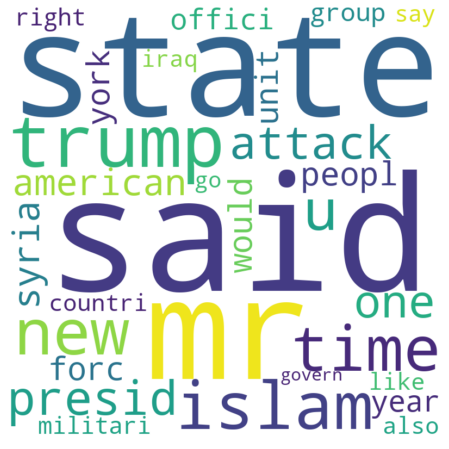

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(common_30))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Topic Modeling

In [12]:
from pprint import pprint
import gensim # Gensim for Topic Modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [13]:
# Create Dictionary 
id2word = corpora.Dictionary(processed_words)

# Create Corpus 
texts = processed_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [29]:
topics_no = 15

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topics_no, #play with this number
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100, #keep this same
                                           passes=10, #keep this same
                                           alpha='auto',
                                           per_word_topics=True)

In [30]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.000*"isotop" + 0.000*"kennel" + 0.000*"hardleft" + 0.000*"huang" + '
  '0.000*"hun" + 0.000*"improvisatori" + 0.000*"inbreed" + 0.000*"ge" + '
  '0.000*"joss" + 0.000*"lsisi"'),
 (1,
  '0.015*"think" + 0.015*"trump" + 0.014*"go" + 0.013*"gigot" + 0.011*"presid" '
  '+ 0.009*"right" + 0.009*"say" + 0.008*"get" + 0.008*"u" + 0.008*"peopl"'),
 (2,
  '0.011*"brown" + 0.010*"martha" + 0.009*"book" + 0.006*"vineyard" + '
  '0.006*"seller" + 0.006*"mastermind" + 0.006*"advers" + 0.005*"week" + '
  '0.005*"review" + 0.004*"fiction"'),
 (3,
  '0.016*"compani" + 0.016*"u" + 0.013*"new" + 0.012*"accord" + 0.012*"inc" + '
  '0.011*"investig" + 0.010*"jone" + 0.010*"feder" + 0.009*"journal" + '
  '0.009*"fbi"'),
 (4,
  '0.047*"mr" + 0.025*"trump" + 0.019*"said" + 0.015*"presid" + 0.012*"state" '
  '+ 0.010*"administr" + 0.010*"u" + 0.010*"offici" + 0.008*"russia" + '
  '0.007*"secur"'),
 (5,
  '0.010*"time" + 0.009*"new" + 0.007*"one" + 0.007*"like" + 0.006*"compani" + '
  '0.005*"world" 

In [31]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -9.274518608650883

Coherence Score:  0.4093069653305534


In [18]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.109431  0.0       1        1  50.581575
0     -0.109431  0.0       2        1  49.418425, topic_info=      Term          Freq         Total Category  logprob  loglift
123  islam   7327.000000   7327.000000  Default  30.0000  30.0000
224  state  10046.000000  10046.000000  Default  29.0000  29.0000
510  syria   4238.000000   4238.000000  Default  28.0000  28.0000
361   forc   4314.000000   4314.000000  Default  27.0000  27.0000
385   iraq   3506.000000   3506.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
204   said   2370.003439  11242.711245   Topic2  -5.4242  -0.8520
230   take   1267.414040   2094.494079   Topic2  -6.0501   0.2025
45    come   1210.085482   1760.831890   Topic2  -6.0964   0.3298
262   york   1209.473064   1832.739893   Topic2  -6.0969   0.2892
257   week   1235.720835   2200.206791   Topic2  -6.0754   0.1279

[177 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5963      1  0.997714        abadi
5963      2  0.002711        abadi
1559      1  0.998862       afghan
1559      2  0.001551       afghan
265       1  0.999260  afghanistan
...     ...       ...          ...
542       2  0.566351         year
262       1  0.339928         york
262       2  0.659668         york
2372      1  0.006188         your
2372      2  0.993107         your

[284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [19]:
# Create the output directory if it doesn't exist
if not os.path.exists('output_summaries'):
    os.makedirs('output_summaries')

In [32]:
# Storing model summaries into output file 
with open(f'output_summaries/lda_summary_{topics_no}_.txt', 'w') as f:
    _=f.write('Number of Topics: '+str(topics_no)+'\n')
    _=f.write('\n'+str(lda_model.print_topics(num_topics=topics_no, num_words=10))+'\n')
    _=f.write('\nPerplexity: '+str(lda_model.log_perplexity(corpus))+'\n')
    _=f.write('\nCoherence Score: '+str(coherence_lda))